 Problem statement:

You will work on a a dataset about diabetes hospital re-admittance. The dataset is available via canvas as part of this assignment. Diabetes is the condition when the body loses its ability to process glucose. It is often associated with overconsumption of food, and obesity. But there are also genetic factors that can cause the disease.

The dataset is a CSV file.

It contains seven features. It also contains one dependent variable, 'Outcome'.

Task 1 - Load the data (5 marks) Use pandas to load the provided csv file.

Use the DataFrame.head command to show the first 10 rows of the data set

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
DataFrame = pd.read_csv("diabetes_assignment.csv")
X = DataFrame.iloc[:,:-1]
y = DataFrame.iloc[:,-1].values
DataFrame.head(10)

,no. pregnancies,blood glucose level,blood pressure,thickness of skin,insulin level,body mass index,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
5,5,116,74,0,0,25.6,30,0
6,3,78,50,32,88,31.0,26,1
7,10,115,0,0,0,35.3,29,0
8,2,197,70,45,543,30.5,53,1
9,8,125,96,0,0,0.0,54,1


Task 2 - Normalisation and PCA (20 marks) Perform a PCA on the data set. Perform the PCA on the correlation matrix, not the covariance matrix. Exclude the dependent variable from processing. The result should contain the maximum number of Principal Components possible.

Make a DataFrame that contains the result of the PCA in the first n columns, n being the number of Principal Components. Columns should be named "PC 1" to "PC n". The last column of the data frame should contain the unprocessed dependent variable. Name the column according to the dependent variable.

Use the DataFrame.head function to display the 10 first rows of the dataset'

In [31]:
X.corr()

,no. pregnancies,blood glucose level,blood pressure,thickness of skin,insulin level,body mass index,Age
no. pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,0.544341
blood glucose level,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.263514
blood pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.239528
thickness of skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,-0.113970
insulin level,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,-0.042163
body mass index,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.036242
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,1.000000


In [32]:
#Normalisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)

StandardScaler()

In [33]:
#Applying PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pc = pca.fit_transform(X)
Data = pd.DataFrame(data = pc
             , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

In [34]:
print(Data.head(10))


          PC1        PC2        PC3        PC4        PC5        PC6       PC7
0  -75.714751 -35.950617  -7.260662  15.668831  16.506475   3.460571 -0.701447
1  -82.358214  28.908171  -5.496678   9.004717   3.481724   5.590084 -2.572537
2  -74.630763 -67.906334  19.461890  -5.653530 -10.300486   7.144867  4.280729
3   11.077589  34.898242  -0.053187   1.315667  -7.618948   2.583326 -0.811533
4   89.742825  -2.745493  25.214031  18.989387   8.519943  -9.483560 -3.615757
5  -80.977788  -3.947083   0.641216 -15.117113  -8.976745   2.314437  1.568356
6    4.351082  46.933747   9.183339  11.509848   4.371940  -0.056943  0.338941
7  -82.137124   7.097700  67.488848   6.131683   8.337363 -12.760238  6.727547
8  468.866624 -31.528750  10.056674  -5.988090  17.256607   7.662648 -4.314021
9  -80.193733 -18.048461 -18.049967 -32.126437   7.121324  28.909151  0.678206


Task 3 - PCA Scatter plot and interpretation (15 marks) Make a scatter plot of the first two principal components. Use small dots as markers. Color the dots according to the dependent variable. Use different colors for all discrete values of the dependent variable. Add a legend to the plot that explains which color is associated with which value of the dependent variable. Label the axes accordingly.

Interpret the findings: By visual inspection, which principal component gives a better separation of the dependent variable? Justify your answer. Three sentences maximum

Text(0, 0.5, 'PC2')

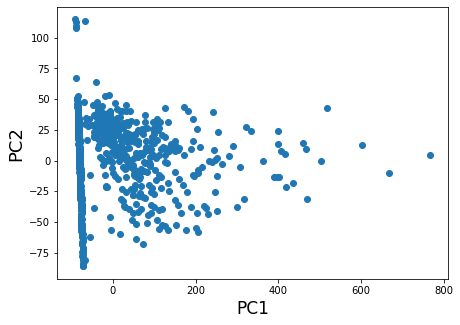

In [52]:
f = plt.figure(figsize=(7,5)) # makes a figure 7 inches wide, 5 inches high
ax = f.gca() # instead of plt.gca()
xvar = 'PC1'
yvar = 'PC2'
ax.scatter(Data[xvar], Data[yvar])
ax.set_xlabel(xvar, size=17)
ax.set_ylabel(yvar, size=18)

Text(0, 0.5, 'PC3')

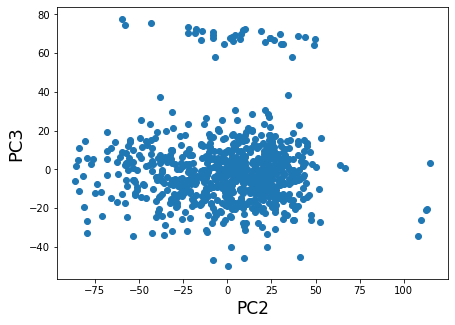

In [36]:
f = plt.figure(figsize=(7,5)) # makes a figure 7 inches wide, 5 inches high
ax = f.gca() # instead of plt.gca()
xvar = 'PC2'
yvar = 'PC3'
ax.scatter(Data[xvar], Data[yvar])
ax.set_xlabel(xvar, size=17)
ax.set_ylabel(yvar, size=18)

Text(0, 0.5, 'PC4')

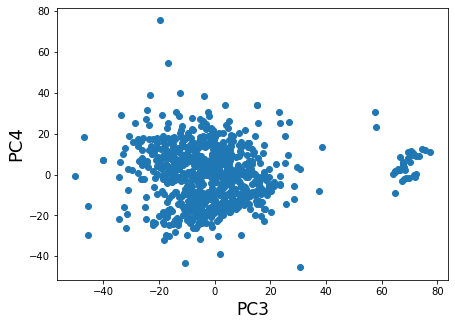

In [37]:
f = plt.figure(figsize=(7,5)) 
ax = f.gca() # instead of plt.gca()
xvar = 'PC3'
yvar = 'PC4'
ax.scatter(Data[xvar], Data[yvar])
ax.set_xlabel(xvar, size=17)
ax.set_ylabel(yvar, size=18)

Text(0, 0.5, 'PC5')

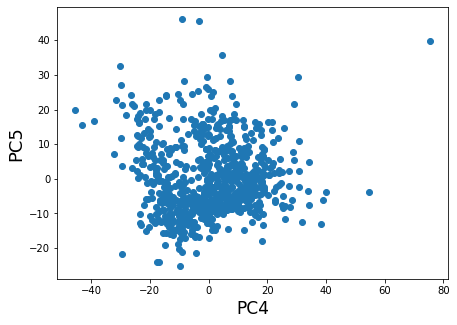

In [38]:
f = plt.figure(figsize=(7,5)) 
ax = f.gca() # instead of plt.gca()
xvar = 'PC4'
yvar = 'PC5'
ax.scatter(Data[xvar], Data[yvar])
ax.set_xlabel(xvar, size=17)
ax.set_ylabel('PC5', size=18)

Text(0, 0.5, 'PC5')

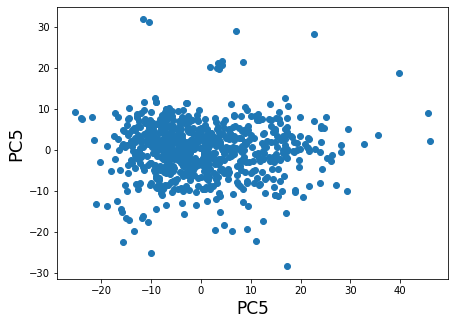

In [39]:
f = plt.figure(figsize=(7,5)) 
ax = f.gca() # instead of plt.gca()
xvar = 'PC5'
yvar = 'PC6'
ax.scatter(Data[xvar], Data[yvar])
ax.set_xlabel(xvar, size=17)
ax.set_ylabel('PC5', size=18)

Text(0, 0.5, 'PC7')

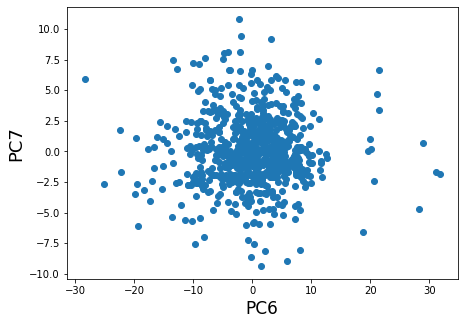

In [40]:
f = plt.figure(figsize=(7,5)) 
ax = f.gca() # instead of plt.gca()
xvar = 'PC6'
yvar = 'PC7'
ax.scatter(Data[xvar], Data[yvar])
ax.set_xlabel(xvar, size=17)
ax.set_ylabel(yvar, size=18)

In [41]:
a = Data.iloc[:, :2]
b = Data.iloc[:, 1:2].values
print(a.shape)

(768, 2)


Task 4 
Covariance/correlation matrix and interpretation (20 marks) Plot the covariance/correlation matrix as an image. Use a divergent colormap and center it on zero. Display a colorbar. Label each row and column according to the feature they represent, i.e. set the xticklabels and yticklabels accordingly. Rotate the labels on the columns by 90 degress to make sure they are legible.

Interpret the result: Name the three pairs of features with the highest correlation

In [42]:
#Covariance/ correlation matrix and interpretation:

print("Covariance matrix")
b = X.cov()
print(b)

Covariance matrix
                     no. pregnancies  blood glucose level  blood pressure  \
no. pregnancies            11.354056            13.947131        9.214538   
blood glucose level        13.947131          1022.248314       94.430956   
blood pressure              9.214538            94.430956      374.647271   
thickness of skin          -4.390041            29.239183       64.029396   
insulin level             -28.555231          1220.935799      198.378412   
body mass index             0.469774            55.726987       43.004695   
Age                        21.570620            99.082805       54.523453   

                     thickness of skin  insulin level  body mass index  \
no. pregnancies              -4.390041     -28.555231         0.469774   
blood glucose level          29.239183    1220.935799        55.726987   
blood pressure               64.029396     198.378412        43.004695   
thickness of skin           254.473245     802.979941        49.37386

In [43]:
c = X.corr()

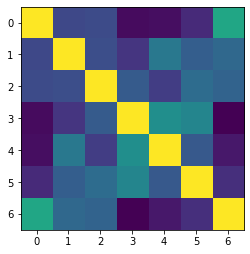

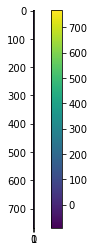

In [44]:
f = plt.figure(figsize=(4,6))
ax = f.gca()
ax.imshow(c.values)
f = plt.figure()
ax = f.gca()
img = ax.imshow(a) # diverging colormaps, since randn varries around mean zero
plt.colorbar(img)

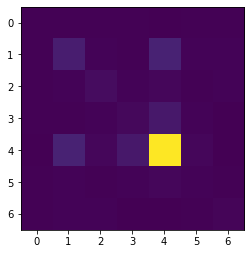

In [45]:
f = plt.figure(figsize=(4,6))
ax = f.gca()
ax.imshow(b.values)

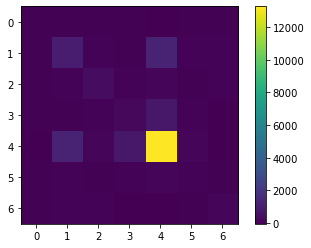

In [46]:
f = plt.figure()
ax = f.gca()
img = ax.imshow(b) # diverging colormaps, since randn varries around mean zero
plt.colorbar(img)

Task 5 - component matrix and interpretation (20 marks) Plot the PCA component matrix as an image. Use a diverging colormap. Center it on zero. Display a colorbar. Use labels for rows and columns to indicate which PC or feature the row or column refers to. Make sure all labels are legible.

Interpret the component matrix, taking your observation from the scatter plot into account. Which features are most likely to be correlated with the outcome? Justify your answer. Five sentences maximum

In [47]:
#Component matrix and interpretation

#pca.components 
#X.comp()



Task 6 - Scree plot and interpretation (10 marks) Plot the explained variance ratio against the number of Principal Components ("scree plot"). Use 'x' as a marker and a dashed line, both colored black. Label the axes accordingly. Set the y-axis limit such that it covers the whole range of values, starting at zero.

Interpret the findings: What fraction of the total variance do the first two PCs explain? How many PCs are required to explain 95% of the variance? Feel free to use extra code to provide exact answers

[1.34565691e+04 9.32759510e+02 3.90577671e+02 1.98181248e+02
 1.12688812e+02 4.58292548e+01 7.76040078e+00]


Text(0, 0.5, 'Y Axis')

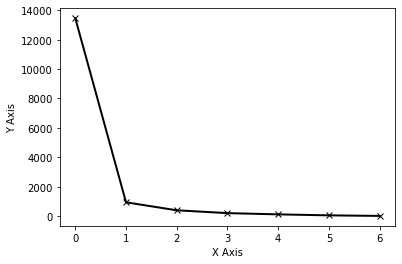

In [48]:
print(pca.explained_variance_)

plt.plot(pca.explained_variance_,'ro-', linewidth=2, color = "black", marker = 'x')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

In [53]:
'''
Total variance do first two PCs explain
 The  total of 5PCs is required for the 95 percent of variance 
Interpretation: (replace 'X' with your answer).

The first two principal components explain X % of the variance.

To explain 95 % of the total variance X principal components are required .'''

"\nTotal variance do first two PCs explain\n The  total of 5PCs is required for the 95 percent of variance \nInterpretation: (replace 'X' with your answer).\n\nThe first two principal components explain X % of the variance.\n\nTo explain 95 % of the total variance X principal components are required ."